An analysis of Australian dining habits using data from Zomato and Gourmet Traveller.

In [29]:
#Dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps
from api_key import apikey 
from api_key import g_key 
from pytrends.request import TrendReq

In [30]:
#Set Search URL
search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id=259&entity_type=city"

#Create Requests
print(requests.get(search_url, headers={"user-key" : apikey}))

#Get Data and Convert into JSON
data = requests.get(search_url, headers={"user-key" : apikey}).json()

#Display JSON Data
data

<Response [200]>


{'results_found': 17505,
 'results_start': 0,
 'results_shown': 20,
 'restaurants': [{'restaurant': {'R': {'has_menu_status': {'delivery': -1,
      'takeaway': -1},
     'res_id': 16577492,
     'is_grocery_store': False},
    'apikey': 'c4ae10a41c1f43f16338d7cc86e554cc',
    'id': '16577492',
    'name': 'Chin Chin',
    'url': 'https://www.zomato.com/melbourne/chin-chin-3-cbd?utm_source=api_basic_user&utm_medium=api&utm_campaign=v2.1',
    'location': {'address': '125 Flinders Lane, CBD, Melbourne',
     'locality': 'CBD',
     'city': 'Melbourne',
     'city_id': 259,
     'latitude': '-37.8155645773',
     'longitude': '144.9703757465',
     'zipcode': '3000',
     'country_id': 14,
     'locality_verbose': 'CBD, Melbourne'},
    'switch_to_order_menu': 0,
    'cuisines': 'Thai, Asian Fusion',
    'timings': '11 AM to 11 PM (Mon-Thu, Sun), 11 AM to 11:30 PM (Fri-Sat)',
    'average_cost_for_two': 135,
    'price_range': 4,
    'currency': '$',
    'highlights': ['Dinner',
     'Cr

In [31]:
#Find Number of Restaurants
resto_num = data["results_found"]

#Print Number of Restaurants
print(f"The number of restaurants in Melbourne, Sydney and Perth is {resto_num}")

The number of restaurants in Melbourne, Sydney and Perth is 17505


In [32]:
#Set City IDs
cityid = [296,259,260]

#Create Empty Lists
rest_id_list = []
rest_name_list =[]
rest_cuis_list = []
rest_local_list = []
rest_city_list = []
rest_lat_list = []
rest_long_list = []
rest_rate_list = []
rest_delivery_list = []
rest_ratenum_list = []

resto_num = 20
loop_num = 0
show_page = 0

#Create For Loop
for citynum in cityid:
    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
    data = requests.get(search_url, headers={"user-key" : apikey}).json()
    for page in range(5):
        for count in range(resto_num):
            try: 
                rest_id = data["restaurants"][count]["restaurant"]["id"]
                rest_name = data["restaurants"][count]["restaurant"]["name"]
                rest_cuis = data["restaurants"][count]["restaurant"]["cuisines"]
                rest_local = data["restaurants"][count]["restaurant"]["location"]["locality"]
                rest_city = data["restaurants"][count]["restaurant"]["location"]["city"]
                rest_lat = data["restaurants"][count]["restaurant"]["location"]["latitude"]
                rest_long = data["restaurants"][count]["restaurant"]["location"]["longitude"]
                rest_rate_num = data["restaurants"][count]["restaurant"]["all_reviews_count"]
                rest_rate = data["restaurants"][count]["restaurant"]["user_rating"]["aggregate_rating"]
                rest_delivery = data["restaurants"][count]["restaurant"]["highlights"]
                
                #Check if they Deliver 
                theydelivery = False
                for doesdelivery in rest_delivery:
                    if doesdelivery == 'Delivery':
                        theydelivery = True

                if theydelivery == True:
                    rest_delivery = "Yes"
                else:
                    rest_delivery = "No"

                #Append Results to List
                rest_id_list.append(rest_id)
                rest_name_list.append(rest_name)
                rest_cuis_list.append(rest_cuis)
                rest_local_list.append(rest_local)
                rest_city_list.append(rest_city)
                rest_lat_list.append(rest_lat)
                rest_long_list.append(rest_long)
                rest_rate_list.append(rest_rate)
                rest_ratenum_list.append(rest_rate_num)
                rest_delivery_list.append(rest_delivery)
                
                #Repeat
                if count == 19:
                    show_page = show_page + 20
                    search_url = f"https://developers.zomato.com/api/v2.1/search?entity_id={citynum}&entity_type=city&start={show_page}"
                    data = requests.get(search_url, headers={"user-key" : apikey}).json()
                    count = 0
            except:
                print("error")
    count = 0
    page = 0
    show_page = 0


#Check for Errors
try:            
    restaurants_df = pd.DataFrame({
        "Restaurant ID":rest_id_list,
        "Name":rest_name_list,
        "Cuisine":rest_cuis_list,
        "Locality":rest_local_list,
        "City":rest_city_list,
        "Latitude":rest_lat_list,
        "Longitude":rest_long_list,
        "Rating":rest_rate_list,
        "Total Number Ratings": rest_ratenum_list,
        "Delivery":rest_delivery_list
    })
except:
    print(len(rest_id_list))
    print(len(rest_name_list))
    print(len(rest_cuis_list))
    print(len(rest_local_list))
    print(len(rest_city_list))
    print(len(rest_lat_list))
    print(len(rest_long_list))
    print(len(rest_rate_list))
    print(len(rest_review_list))
    print(len(rest_delivery_list))
    
#Drop Duplicate Results    
restaurants_df = restaurants_df.drop_duplicates()

#Print DataFrame
restaurants_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16600038,Bib & Tucker,"Modern Australian, Cafe Food",North Fremantle,Perth,-32.0284215000,115.7498293000,4.1,692,No
1,16597645,Mrs. S,"Patisserie, Cafe Food",Maylands,Perth,-31.9286800875,115.8919624239,4.5,643,No
2,18196379,tbsp.,"Sandwich, Coffee and Tea, Cafe Food",Bayswater,Perth,-31.9194560000,115.9096643000,4.7,335,No
3,16598431,Tuck Shop Cafe,"Modern Australian, Cafe Food",Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
4,16599082,Sayers Sister,"Modern Australian, Coffee and Tea",Perth CBD,Perth,-31.9404785312,115.8615736663,4.6,496,No
...,...,...,...,...,...,...,...,...,...,...
295,16558672,Pancakes On The Rocks,"Grill, Desserts, Pizza, Cafe Food, Coffee and Tea",The Rocks,Sydney,-33.8586584831,151.2084479257,4.1,324,No
296,18518832,The Grounds of the City,"Cafe Food, Coffee and Tea",CBD,Sydney,-33.8721590260,151.2070344016,4.2,243,No
297,16559582,Spice Temple,"Chinese, Fusion, Yum Cha",CBD,Sydney,-33.8661222694,151.2100026011,4.3,244,No
298,17744545,Gogyo,"Japanese, Ramen",Surry Hills,Sydney,-33.8823602716,151.2101410702,4.5,120,No


In [33]:
#Save DataFrame as CSV
restaurants_df.to_csv("Multi_Restaurant_Data.csv", encoding="utf-8", index=False)

In [34]:
#Number of Restaurants that Deliver
restaurants_df["Delivery"].value_counts()

No     273
Yes     27
Name: Delivery, dtype: int64

In [35]:
#Sort DataFrame by Rating
restaurants_df = restaurants_df.sort_values(by=["Rating"],ascending=False)

#Print DataFrame
reshaped = \
(restaurants_df.set_index(restaurants_df.columns.drop('Cuisine',1).tolist())
   .Cuisine.str.split(', ', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Cuisine'})
   .loc[:, restaurants_df.columns]
)

reshaped_df = pd.DataFrame(reshaped)
reshaped_df

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16572612,Vue de monde,Australian,CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
1,16572612,Vue de monde,Contemporary,CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
2,16583098,Lune Croissanterie,Bakery,Fitzroy,Melbourne,-37.7960258682,144.9799244106,4.9,753,No
3,16583098,Lune Croissanterie,French,Fitzroy,Melbourne,-37.7960258682,144.9799244106,4.9,753,No
4,16562433,Cow & The Moon,Ice Cream,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
...,...,...,...,...,...,...,...,...,...,...
647,16601141,Architects and Heroes,Modern Australian,"Rokeby Road, Subiaco",Perth,-31.9460753339,115.8240401745,3.8,211,No
648,16601141,Architects and Heroes,Cafe Food,"Rokeby Road, Subiaco",Perth,-31.9460753339,115.8240401745,3.8,211,No
649,16599918,Jamie's Italian,Italian,Perth CBD,Perth,-31.9517195884,115.8580579609,3.8,1473,No
650,16601603,Lucky Chan's Laundry + Noodlebar,Asian,Northbridge,Perth,-31.9465239852,115.8608149365,2.9,389,No


In [36]:
#Count Number of Cuisines
top_cuisines = reshaped_df["Cuisine"].value_counts()

#Get Top 10
top_10_cuisines = top_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_cuisines

Cafe Food            94
Coffee and Tea       85
Japanese             61
Modern Australian    50
Desserts             24
                     ..
Vegetarian            1
Modern European       1
Israeli               1
Dumplings             1
Singaporean           1
Name: Cuisine, Length: 64, dtype: int64

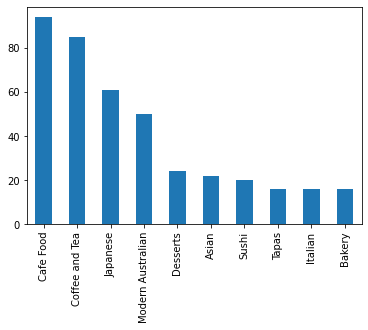

In [37]:
#Plot as Bar Graph
top_10_cuisines.plot(kind='bar')

#Save as PNG
plt.savefig("Images/Top10Cuisines.png")

In [38]:
#Get Top Restaurants in Perth
perth_top = reshaped_df.loc[reshaped_df["City"]=="Perth"]

#Print DataFrame
perth_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
10,16598976,Marumo,Japanese,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
11,16598976,Marumo,Seafood,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
12,16598976,Marumo,Modern Australian,Nedlands,Perth,-31.9802157847,115.7966588438,4.9,141,No
38,16598837,Run Amuk,Fast Food,"Orient Street, South Fremantle",Perth,-32.0722768677,115.7530652359,4.9,341,No
41,16597513,Pacific Rim Mix Plate,Hawaiian,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
42,16597513,Pacific Rim Mix Plate,Japanese,Applecross,Perth,-32.0219001116,115.8322872967,4.9,213,No
43,16598431,Tuck Shop Cafe,Modern Australian,Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
44,16598431,Tuck Shop Cafe,Cafe Food,Northbridge,Perth,-31.9467356499,115.8621080965,4.8,799,No
46,16598168,Nobu Perth,Japanese,Burswood,Perth,-31.9605255258,115.8940253779,4.8,663,No
47,16598168,Nobu Perth,Sushi,Burswood,Perth,-31.9605255258,115.8940253779,4.8,663,No


In [39]:
#Get Top Cuisines in Perth
top_P_cuisines = perth_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Perth
top_10_P_cuisines = top_P_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_P_cuisines

Cafe Food            31
Modern Australian    27
Japanese             16
Coffee and Tea       14
Tapas                11
Sushi                 9
Italian               8
Bar Food              6
Asian                 6
Burger                5
European              5
Sandwich              4
Mediterranean         4
Bakery                4
Spanish               3
Healthy Food          3
Middle Eastern        3
BBQ                   3
Malaysian             3
Pizza                 3
Desserts              3
Mexican               3
French                2
Chinese               2
Thai                  2
Steak                 2
Fast Food             2
Seafood               2
Australian            2
American              2
Street Food           1
Latin American        1
Vietnamese            1
Fusion                1
Beverages             1
Korean                1
Hawaiian              1
Ramen                 1
Greek                 1
Brazilian             1
Patisserie            1
Name: Cuisine, d

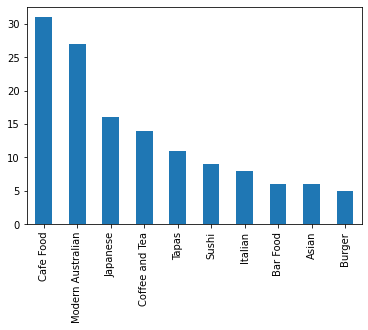

In [40]:
#Plot Top 10 Cuisines in Perth
top_10_P_cuisines.plot(kind='bar')

#Save as PNG
plt.savefig("Images/Top10CuisinesPerth.png")

In [41]:
#Get Top Restaurants in Melbourne
melbourne_top = reshaped_df.loc[reshaped_df["City"]=="Melbourne"]

#Print DataFrame
melbourne_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16572612,Vue de monde,Australian,CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
1,16572612,Vue de monde,Contemporary,CBD,Melbourne,-37.8189544974,144.9579336494,4.9,986,No
2,16583098,Lune Croissanterie,Bakery,Fitzroy,Melbourne,-37.7960258682,144.9799244106,4.9,753,No
3,16583098,Lune Croissanterie,French,Fitzroy,Melbourne,-37.7960258682,144.9799244106,4.9,753,No
15,16585905,Tipo 00,Italian,CBD,Melbourne,-37.8135277429,144.9619733915,4.9,721,No
16,16577212,Beatrix,Coffee and Tea,North Melbourne,Melbourne,-37.8023673299,144.9444753304,4.9,384,No
17,16577212,Beatrix,Bakery,North Melbourne,Melbourne,-37.8023673299,144.9444753304,4.9,384,No
22,16573759,Le Petit Gateau,French,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
23,16573759,Le Petit Gateau,Desserts,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No
24,16573759,Le Petit Gateau,Coffee and Tea,CBD,Melbourne,-37.8163464526,144.9596324936,4.9,350,No


In [42]:
#Get Top Cuisines in Melbourne
top_M_cuisines = melbourne_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Melbourne
top_10_M_cuisines = top_M_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_M_cuisines

Coffee and Tea       36
Cafe Food            31
Japanese             22
Desserts             10
Modern Australian     8
Asian                 8
Sushi                 8
Korean                5
French                5
Bakery                5
Chinese               4
Australian            4
Steak                 4
Thai                  3
Tapas                 3
American              3
Asian Fusion          3
Ice Cream             3
Japanese BBQ          3
Italian               3
Fusion                3
Contemporary          3
Mediterranean         2
BBQ                   2
Korean BBQ            2
Middle Eastern        2
European              2
Patisserie            2
Pizza                 2
Taiwanese             2
Ramen                 2
Vegan                 1
Seafood               1
Healthy Food          1
Hot Pot               1
Israeli               1
Malaysian             1
Dumplings             1
Modern European       1
Mexican               1
Burger                1
Bar Food        

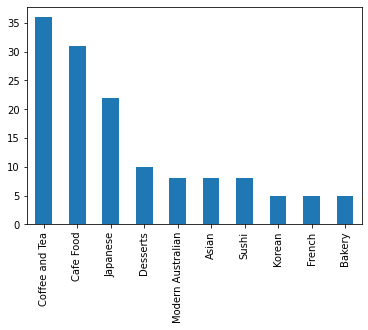

In [43]:
#Plot Top 10 Cuisines in Melbourne
top_10_M_cuisines.plot(kind='bar')

#Save as PNG
plt.savefig("Images/Top10CuisinesMel.png")

In [44]:
#Get Top Restaurants in Sydney
sydney_top = reshaped_df.loc[reshaped_df["City"]=="Sydney"]

#Print DataFrame
sydney_top.head(10)

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
4,16562433,Cow & The Moon,Ice Cream,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
5,16562433,Cow & The Moon,Desserts,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
6,16562433,Cow & The Moon,Coffee and Tea,Enmore,Sydney,-33.8990000921,151.1720285565,4.9,356,No
7,16559171,Tetsuya's,Japanese,CBD,Sydney,-33.8751364638,151.2049677596,4.9,330,No
8,16569454,LuMi Bar & Dining,Italian,Pyrmont,Sydney,-33.8669045524,151.1973965541,4.9,197,No
9,16569454,LuMi Bar & Dining,Japanese,Pyrmont,Sydney,-33.8669045524,151.1973965541,4.9,197,No
13,16558798,Quay,Modern Australian,Circular Quay,Sydney,-33.8580292558,151.2099704146,4.9,452,No
14,16568476,La Mamma del Gelato Anita,Ice Cream,"Central Park, Chippendale",Sydney,-33.8850718252,151.2004720420,4.9,231,No
18,15547004,Restaurant Hubert,French,CBD,Sydney,-33.8653806250,151.2104904279,4.9,231,No
19,15547004,Restaurant Hubert,European,CBD,Sydney,-33.8653806250,151.2104904279,4.9,231,No


In [45]:
#Get Cuisines in Sydney
top_S_cuisines = sydney_top["Cuisine"].value_counts()

#Get Top 10 Cuisines in Sydney
top_10_S_cuisines = top_S_cuisines.iloc[[0,1,2,3,4,5,6,7,8,9]]

#Print Results
top_S_cuisines

Coffee and Tea       35
Cafe Food            32
Japanese             23
Modern Australian    15
Desserts             11
Salad                 9
Asian                 8
Bakery                7
Ramen                 7
Chinese               6
French                5
Italian               5
Steak                 4
Seafood               4
Yum Cha               3
Ice Cream             3
Sushi                 3
Healthy Food          3
Thai                  3
Fried Chicken         3
Fusion                3
Hot Pot               2
Poké                  2
American              2
Burger                2
Juices                2
BBQ                   2
Asian Fusion          2
European              2
Taiwanese             2
Tapas                 2
Bar Food              2
Japanese BBQ          2
Sandwich              2
Malaysian             2
Mexican               2
Mediterranean         1
Grill                 1
Vegetarian            1
Middle Eastern        1
Patisserie            1
Street Food     

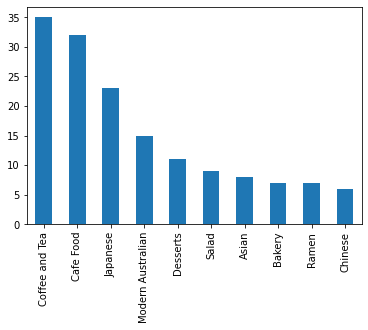

In [46]:
#Plot Top 10 Cuisines in Sydney
top_10_S_cuisines.plot(kind='bar')

#Save as PNG
plt.savefig("Images/Top10CuisinesSydney.png")

In [47]:
#Get Zomato Restaurant CSV file
multi_city = "Multi_Restaurant_Data.csv"

#Read Zomato Restaurant CSV file
multi_df = pd.read_csv(multi_city)

#Get Gourmet Traveller 2019 Ratings CSV file
top_resto_rating = "GT_Top_Restaurants.csv"

#Read Gourmet Traveller 2019 Ratings CSV file
top_resto_rating_df = pd.read_csv(top_resto_rating)

#Get Gourmet Traveller 2019 without Ratings CSV file
top_resto = "GT_Top_Resto.csv"

#Read Gourmet Traveller 2019 without Ratings CSV file
top_resto_df = pd.read_csv(top_resto)

In [48]:
#Print Gourmet Traveller 2019 Ratings DataFrame
top_resto_rating_df

,Rating,Name,City,Latitude,Longitude
0,1,Quay,Sydney,-33.857606,151.207970
1,2,Momofuku Seiobo,Sydney,-33.869509,151.193575
2,3,Orana,Adelaide,-34.922622,138.607939
3,4,Attica,Melbourne,-37.877005,144.995120
4,5,Brae,Melbourne,-38.346922,143.805033
...,...,...,...,...,...
95,96,Yellow,Sydney,-33.868693,151.223245
96,97,Bar Lourinhã,Melbourne,-37.812811,144.970330
97,98,Gerard's Bistro,Brisbane,-27.456514,153.036807
98,99,St Isidore,Sydney,-35.320556,150.430867


In [49]:
#Merge Zomato Restaurant and Gourmet Traveller 2019 without Ratings DataFrames
merged_top_resto = pd.merge(multi_df, top_resto_df, on='Name', how='inner')

#Print DataFrame
merged_top_resto

,Restaurant ID,Name,Cuisine,Locality,City,Latitude,Longitude,Rating,Total Number Ratings,Delivery
0,16597743,Rockpool Bar & Grill,"Steak, Modern Australian, Bar Food",Burswood,Perth,-31.961158,115.894267,4.2,791,No
1,16572235,Rockpool Bar & Grill,"Seafood, Steak, Australian","Crown Melbourne, Southbank",Melbourne,-37.821970,144.960356,4.5,1094,No
2,16559790,Rockpool Bar & Grill,"Seafood, Steak, Modern Australian, Poké",CBD,Sydney,-33.866030,151.210022,4.6,397,No
3,16586014,Minamishima,"Japanese, Sushi",Richmond,Melbourne,-37.819831,145.005194,4.9,293,No
4,16573067,Cutler & Co,Modern Australian,Fitzroy,Melbourne,-37.805571,144.975943,4.7,569,No
5,15547004,Restaurant Hubert,"French, European",CBD,Sydney,-33.865381,151.210490,4.9,231,No
